# Directory, Libraries and Data

In [5]:
#Import libraries
import numpy as np
import pandas as pd
from prophet import Prophet

In [42]:
#Data
df = pd.read_csv("DHS_Daily_Report_2020.csv")
df.tail(33)

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas,Temperature
2524,11/29/2020,53708,0,0,0,11.21
2525,11/30/2020,53745,0,0,0,16.62
2526,12/1/2020,53686,0,0,0,13.47
2527,12/2/2020,53592,0,0,0,7.19
2528,12/3/2020,53501,0,0,0,9.30
2529,12/4/2020,53634,0,0,0,10.15
2530,12/5/2020,53610,0,0,0,8.65
2531,12/6/2020,53676,0,0,0,5.13
2532,12/7/2020,53686,0,0,0,4.43
2533,12/8/2020,53674,0,0,0,3.30


In [43]:
#Looking into what kind of variables we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          2557 non-null   object 
 1   Total Individuals in Shelter  2557 non-null   int64  
 2   Easter                        2557 non-null   int64  
 3   Thanksgiving                  2557 non-null   int64  
 4   Christmas                     2557 non-null   int64  
 5   Temperature                   2557 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 120.0+ KB


In [44]:
#Summary statistics
df.describe()

,Total Individuals in Shelter,Easter,Thanksgiving,Christmas,Temperature
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,57937.296832,0.002738,0.002738,0.002738,14.863011
std,2361.978113,0.052260,0.052260,0.052260,8.848964
min,50689.000000,0.000000,0.000000,0.000000,-8.850000
25%,56729.000000,0.000000,0.000000,0.000000,7.620000
50%,58369.000000,0.000000,0.000000,0.000000,14.870000
75%,59856.000000,0.000000,0.000000,0.000000,23.090000
max,61415.000000,1.000000,1.000000,1.000000,30.900000


# Data Preparation

In [45]:
#Date variable: %m/%d/%Y -> %Y-%m-%d
df.Date = pd.to_datetime(df.Date,
                         format = "%m/%d/%Y")
df.Date

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2552   2020-12-27
2553   2020-12-28
2554   2020-12-29
2555   2020-12-30
2556   2020-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [46]:
#Change variable: Date -> ds, time-series (Udemy) -> y
df = df.rename(columns = {'Date': 'ds',
                          'Total Individuals in Shelter': 'y'})
df.head(1)

,ds,y,Easter,Thanksgiving,Christmas,Temperature
0,2014-01-01,50689,0,0,0,2.17


# holidays

In [47]:
#Easter
easter_dates = pd.to_datetime(df[df.Easter ==1 ].ds)
easter = pd.DataFrame({'holiday': 'easter',
                       'ds': easter_dates,
                       'lower_window': -3,
                       'upper_window': 4})

In [49]:
#Thanksgiving
Thanksgiving_dates = pd.to_datetime(df[df['Thanksgiving'] == 1].ds)
Thanksgiving = pd.DataFrame({'holiday': 'Thanksgiving',
                   'ds': Thanksgiving_dates,
                   'lower_window': -7,
                   'upper_window': 2})

In [51]:
#combine the holidays
holidays = pd.concat([easter, Thanksgiving])
holidays

,holiday,ds,lower_window,upper_window
109,easter,2014-04-20,-3,4
459,easter,2015-04-05,-3,4
816,easter,2016-03-27,-3,4
1201,easter,2017-04-16,-3,4
1551,easter,2018-04-01,-3,4
1936,easter,2019-04-21,-3,4
2293,easter,2020-04-12,-3,4
330,Thanksgiving,2014-11-27,-7,2
694,Thanksgiving,2015-11-26,-7,2
1058,Thanksgiving,2016-11-24,-7,2


In [52]:
#Tidying up the DF
df = df.drop(columns = ["Easter", "Thanksgiving"])
df.head(2)

,ds,y,Christmas,Temperature
0,2014-01-01,50689,0,2.17
1,2014-01-02,50797,0,2.51


# Facebook Prophet 

In [53]:
#Training and Test Split
test_days = 31
training = df.iloc[:-test_days, : ]
test = df.iloc[-test_days:, : ]
print(test.head(1))
print(training.tail(1))

             ds      y  Christmas  Temperature
2526 2020-12-01  53686          0        13.47
             ds      y  Christmas  Temperature
2525 2020-11-30  53745          0        16.62


In [54]:
#Prophet Model
m = Prophet(growth = 'linear',
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale= 0.05)
m.add_regressor("Christmas")
m.add_regressor("Temperature")
#m.add_regressor('XXXX')
m.fit(training)

23:55:04 - cmdstanpy - INFO - Chain [1] start processing
23:55:09 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
#Regressor coefficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,multiplicative,0.000000,-0.000131,-0.000131,-0.000131
1,Temperature,multiplicative,14.960234,-0.000188,-0.000188,-0.000188


# Accuracy Assesment

In [56]:
#create future dataframe
future = m.make_future_dataframe(periods = test_days,
                                 freq = 'D')
future = pd.concat([future, df.iloc[:, 2:]],
                   axis = 1)
future

,ds,Christmas,Temperature
0,2014-01-01,0,2.17
1,2014-01-02,0,2.51
2,2014-01-03,0,-6.35
3,2014-01-04,0,-1.27
4,2014-01-05,0,7.18
...,...,...,...
2552,2020-12-27,0,2.89
2553,2020-12-28,0,8.83
2554,2020-12-29,0,3.48
2555,2020-12-30,0,5.97


In [ ]:
#forecasting
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Temperature,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,50073.737610,50489.387947,51247.750023,50073.737610,50073.737610,0.0,0.0,0.0,0.002407,...,0.000730,0.000730,0.000730,0.012608,0.012608,0.012608,0.0,0.0,0.0,50862.175803
1,2014-01-02,50094.479924,50501.230089,51219.152369,50094.479924,50094.479924,0.0,0.0,0.0,0.002343,...,0.000621,0.000621,0.000621,0.012770,0.012770,0.012770,0.0,0.0,0.0,50882.695098
2,2014-01-03,50115.222239,50550.228439,51294.754143,50115.222239,50115.222239,0.0,0.0,0.0,0.004011,...,-0.000886,-0.000886,-0.000886,0.012999,0.012999,0.012999,0.0,0.0,0.0,50923.278194
3,2014-01-04,50135.964553,50501.581370,51235.586916,50135.964553,50135.964553,0.0,0.0,0.0,0.003055,...,-0.001560,-0.001560,-0.001560,0.013291,0.013291,0.013291,0.0,0.0,0.0,50877.269054
4,2014-01-05,50156.706867,50520.887473,51307.092092,50156.706867,50156.706867,0.0,0.0,0.0,0.001464,...,0.000148,0.000148,0.000148,0.013643,0.013643,0.013643,0.0,0.0,0.0,50921.882661


In [59]:
#Retrieve the predictions
predictions = forecast.yhat[-test_days:]
predictions[:2]

2526    54920.125102
2527    55025.260654
Name: yhat, dtype: float64

In [60]:
#Accuracy assessment
#MAR-RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(test.y, predictions))
print(np.sqrt(mean_squared_error(test.y, predictions)))

1323.0145383721344
1329.3011608582585


# Visualization

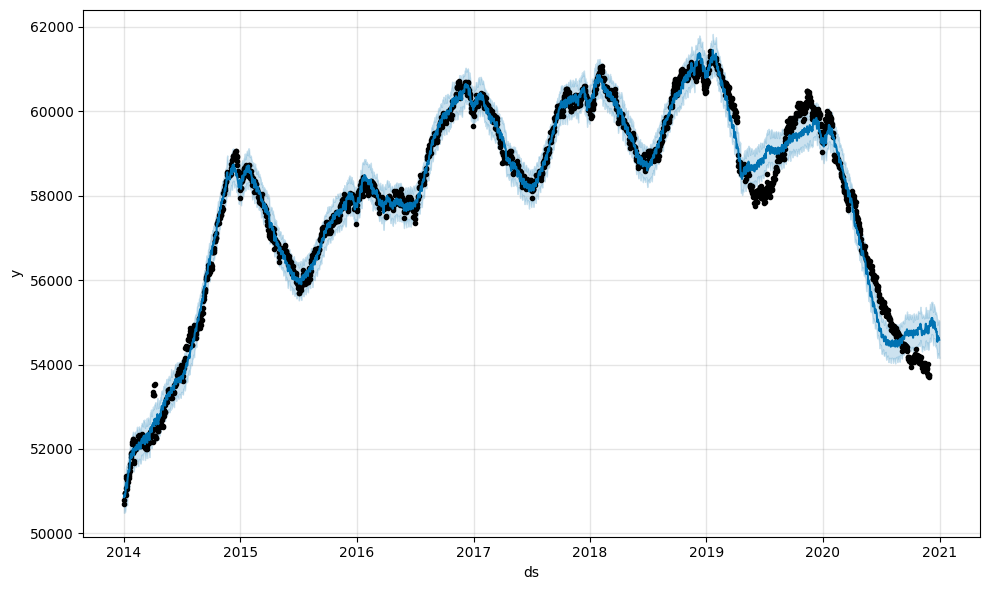

In [61]:
#Visualize the forecast
m.plot(forecast);

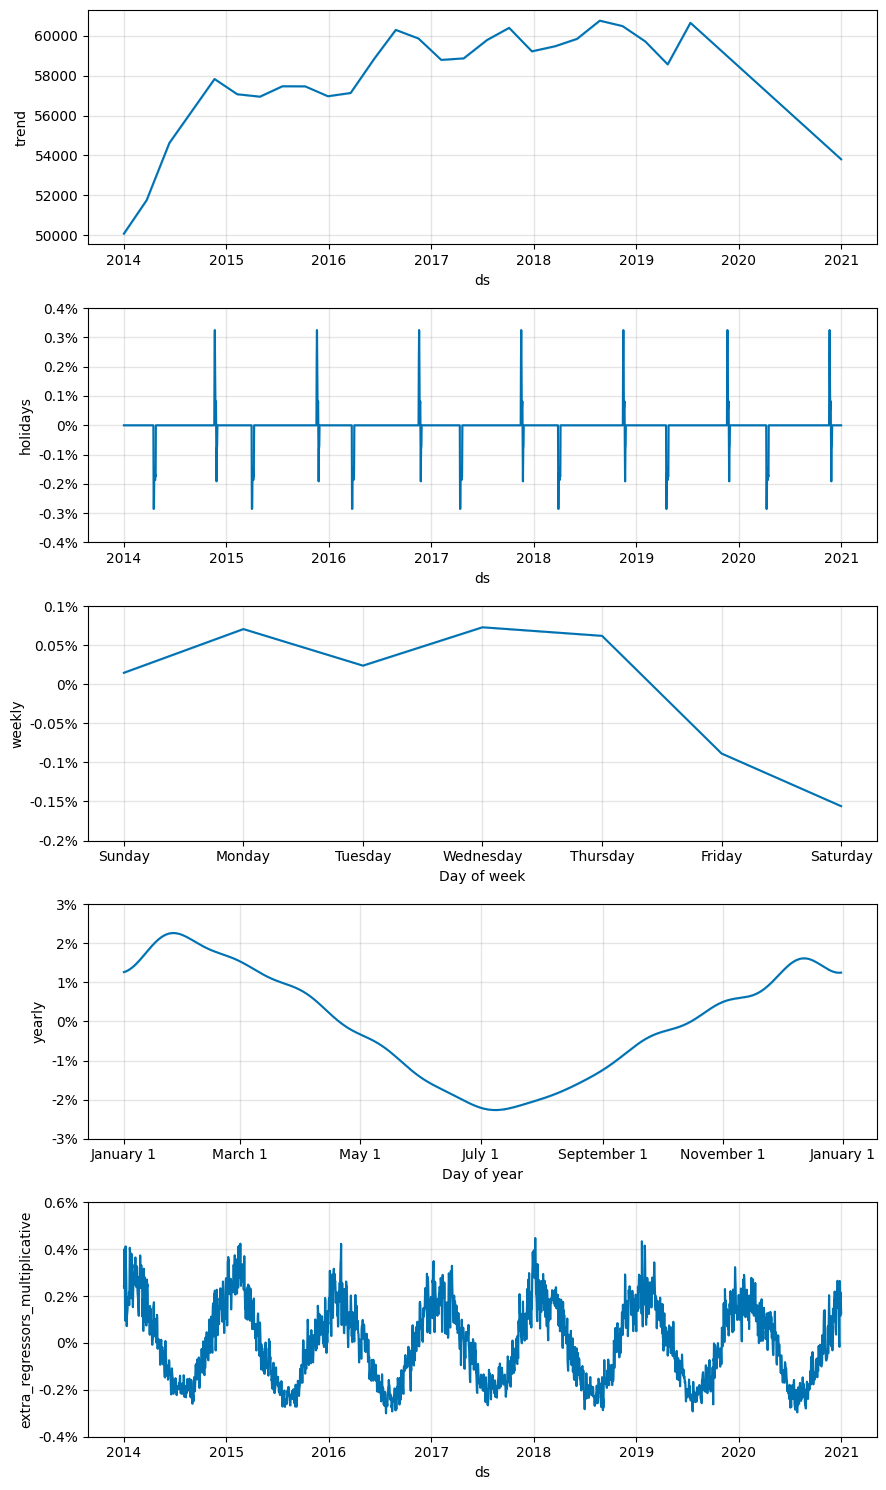

In [62]:
#plot components -> Structural Time Series decomposition
m.plot_components(forecast);

# Cross-Validation

In [63]:
#CV
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,
                         horizon = '31 days',
                         initial = '1450 days',
                         parallel = 'processes')

In [64]:
#Output of the CV
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-12-27,60079.592992,59913.152665,60252.781696,60033,2017-12-26 12:00:00
1,2017-12-28,60063.599256,59887.814737,60239.194335,60079,2017-12-26 12:00:00
2,2017-12-29,59937.327739,59755.361463,60103.144107,60050,2017-12-26 12:00:00
3,2017-12-30,59857.598139,59686.231758,60031.453855,60017,2017-12-26 12:00:00
4,2017-12-31,59965.177530,59791.126760,60143.345538,59933,2017-12-26 12:00:00


In [65]:
#Error assessment
print(mean_absolute_error(df_cv['y'], df_cv['yhat']))
print(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])))

497.12924456057937
765.5290683202406


c:\Program Files\Python313\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Program Files\Python313\Lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


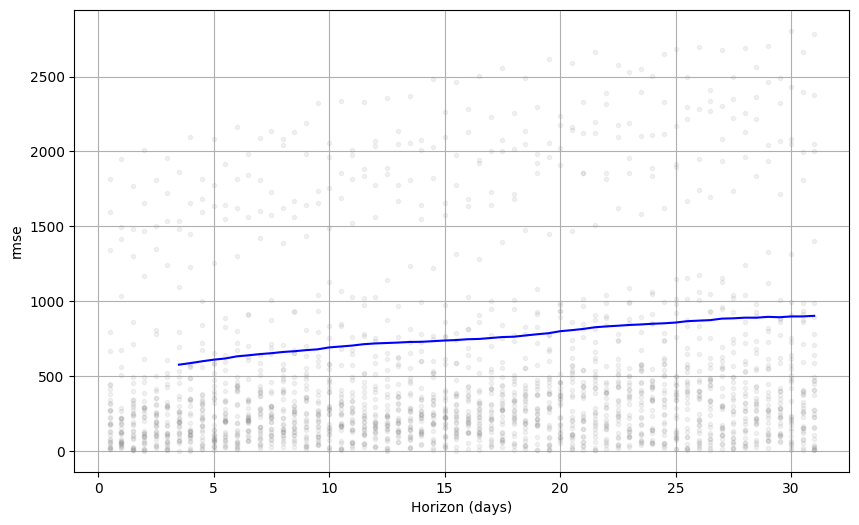

In [66]:
#CV Visualization
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,
                             metric = 'rmse');

# Parameter tuning

In [67]:
#Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'seasonality_prior_scale': [5, 10, 20],
              'holidays_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1]}
grid = ParameterGrid(param_grid)
len(list(grid))              

27

In [ ]:
#Empty list to store results
rmse = []
#start the loop
for params in grid:
  #build the model
  m = Prophet(growth = 'linear',
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = params['seasonality_prior_scale'],
            holidays_prior_scale = params['holidays_prior_scale'],
            changepoint_prior_scale= params['changepoint_prior_scale'])
  m.add_regressor("Christmas")
  m.add_regressor("Temperature")
  m.fit(training)

  #Cross-Validation
  df_cv = cross_validation(m,
                           horizon = '31 days',
                           initial = '2300 days',
                           parallel = 'processes')

  #Measure and store results
  error = np.sqrt(mean_squared_error(df_cv.y, df_cv.yhat))
  rmse.append(error)

In [69]:
# finding how many observations
training.shape

(2526, 4)

In [70]:
#Find the best parameters
best_params = grid[np.argmin(rmse)]
print(best_params)

{'seasonality_prior_scale': 20, 'holidays_prior_scale': 20, 'changepoint_prior_scale': 0.1}
